# Load prediction of CT1 based on Ambient Conditions
### by analysis of ambient condition, deduce the ideal load of the machine using previous data
5 year data  
convert into single df  
part data into 80:20 ratio (80% training data and 20% test data)

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
#from pandas import ExcelWriter
#from pandas import ExcelFile
df = pd.read_excel('data/Ops Monthly Returns 2016.xls',
                   #skiprows = [0,1,3,4],            
                   #skipfooter= 48, #Number of rows to skip from bottom
                   usecols= "B:F", #Column index in Excel format
                   sheet_name=0)

In [2]:
print(df.columns)

df=df[df["Base_hours"]==24]
df

Index(['Amb_Temp_F', 'Avg_RH_Pct', 'Base_hours', 'Gen_MWH', 'Comp_eff'], dtype='object')


,Amb_Temp_F,Avg_RH_Pct,Base_hours,Gen_MWH,Comp_eff
0,80.70,0.6210,24,1064,85.700
1,81.60,0.6280,24,1057,85.700
2,78.00,0.6310,24,1072,85.700
3,81.00,0.4790,24,1086,85.540
4,81.10,0.4830,24,1087,85.570
...,...,...,...,...,...
270,60.69,0.6341,24,1095,84.480
271,62.30,0.7090,24,1073,84.230
272,62.79,0.7565,24,1056,84.019
273,55.00,0.8900,24,1077,84.010


In [3]:
y=df["Gen_MWH"]
y

0      1064
1      1057
2      1072
3      1086
4      1087
       ... 
270    1095
271    1073
272    1056
273    1077
274    1070
Name: Gen_MWH, Length: 251, dtype: int64

In [4]:
df=df.drop(columns=["Gen_MWH"])
df

,Amb_Temp_F,Avg_RH_Pct,Base_hours,Comp_eff
0,80.70,0.6210,24,85.700
1,81.60,0.6280,24,85.700
2,78.00,0.6310,24,85.700
3,81.00,0.4790,24,85.540
4,81.10,0.4830,24,85.570
...,...,...,...,...
270,60.69,0.6341,24,84.480
271,62.30,0.7090,24,84.230
272,62.79,0.7565,24,84.019
273,55.00,0.8900,24,84.010


In [5]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(200, 4) (200,)
(51, 4) (51,)


In [6]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = model.predict(X_test)

Text(0, 0.5, 'Predictions')

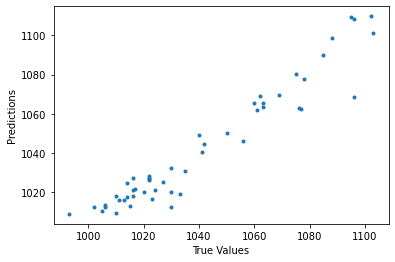

In [7]:
## The line / model
%matplotlib inline
plt.plot(y_test, predictions,'.')
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [8]:
#d=y_test-predictions
y_test.values-predictions

array([-8.99237242e+00,  2.00757474e+00, -1.07904228e-01, -5.60175446e-01,
       -4.68718459e+00,  3.97149608e+00, -3.71484933e+00,  2.29964780e-01,
        1.79527800e+00,  5.42874711e-01, -7.73320460e+00, -2.48260549e+00,
       -1.04373820e+01, -5.25130498e+00,  3.75933180e-01, -1.07623440e+01,
        6.46055339e+00, -1.20054165e+00, -7.05589985e+00, -1.06819922e+01,
       -5.21150265e+00, -2.12739929e-02, -7.62479055e+00, -6.28197616e+00,
        9.97177621e+00,  1.46472467e+01, -6.39992034e+00, -5.38230821e+00,
       -3.04136334e+00, -5.48381946e+00, -2.36504511e+00,  1.75996691e+01,
       -5.61045305e-01,  1.31452201e+01, -1.21015933e+01, -4.17833365e+00,
        2.98721660e+00, -5.38909703e+00, -8.21461013e+00, -5.59238359e+00,
       -1.59807122e+01, -1.43756600e+01, -2.58388706e+00,  2.22741866e+00,
       -5.05972048e+00, -1.10468876e+01,  2.76183506e+01, -2.62590468e+00,
       -4.90702681e+00,  1.37749093e+01,  9.87394065e+00])

In [9]:
df=df.drop(columns="Base_hours")
df

,Amb_Temp_F,Avg_RH_Pct,Comp_eff
0,80.70,0.6210,85.700
1,81.60,0.6280,85.700
2,78.00,0.6310,85.700
3,81.00,0.4790,85.540
4,81.10,0.4830,85.570
...,...,...,...
270,60.69,0.6341,84.480
271,62.30,0.7090,84.230
272,62.79,0.7565,84.019
273,55.00,0.8900,84.010


In [10]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(200, 3) (200,)
(51, 3) (51,)


In [11]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = model.predict(X_test)

Text(0, 0.5, 'Predictions')

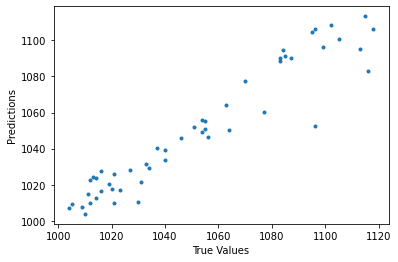

In [12]:
## The line / model
plt.plot(y_test, predictions,'.')
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [13]:
#y_test['predictions'] = predictions
#y_test

In [14]:
# MSE (Mean Squared Error)
# sum(y-y')^2 / number of items
mse = np.sum((y_test.values-predictions)**2)/y_test.size
print(mse)
np.average((y_test.values-predictions)**2)

115.85204167577224


115.85204167577224

In [15]:
# Display weights and Bias of above Regression relation
for colnum in range(len(df.columns)):
    print("Weight for",df[df.columns[colnum]].name, model.coef_[colnum])
print()        
print("Bias:", model.intercept_)

Weight for Amb_Temp_F -3.739558421082641
Weight for Avg_RH_Pct -232.33253527319448
Weight for Comp_eff 13.968800243095057

Bias: 299.00785840308004
